In [500]:
# Standard data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and causal inference
import econml
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

# System utilities
import os

# Get and print the current working directory
current_path = os.getcwd()
print(f"Current working directory: {current_path}")


Current working directory: /Users/congminhnguyen/ML Submission /HTE-edu


In [501]:
df = pd.read_stata(os.path.join(current_path, 'data/student_test_data.dta'))


In [502]:
df_teacher = pd.read_stata(os.path.join(current_path, 'data/teacher_pres_data.dta'))
df_teacher.head(20)

,teacherid,schoolid,tracking,bungoma,etpteacher,lowstream,yrstaught,visitno,realdate,pres,inclass,female
0,376.0,889.0,1.0,0.0,0.0,0.0,NaN,6.0,2006-06-27,1.0,0.0,0.0
1,377.0,983.0,0.0,0.0,1.0,0.0,NaN,6.0,2006-07-05,1.0,1.0,0.0
2,378.0,770.0,0.0,0.0,0.0,0.0,NaN,6.0,2006-07-18,1.0,1.0,0.0
3,381.0,975.0,0.0,0.0,1.0,0.0,NaN,6.0,2006-07-03,1.0,1.0,0.0
4,382.0,769.0,0.0,0.0,0.0,0.0,NaN,6.0,2006-07-05,1.0,1.0,0.0
5,385.0,887.0,1.0,0.0,0.0,1.0,NaN,6.0,2006-07-04,1.0,1.0,1.0
6,5043002.0,430.0,1.0,1.0,0.0,1.0,32.0,1.0,NaT,1.0,1.0,0.0
7,5043002.0,430.0,1.0,1.0,0.0,1.0,32.0,2.0,2005-06-27,1.0,0.0,0.0
8,5043002.0,430.0,1.0,1.0,0.0,1.0,32.0,3.0,2005-09-22,1.0,1.0,0.0
9,5043002.0,430.0,1.0,1.0,0.0,1.0,32.0,5.0,2006-03-17,1.0,0.0,0.0


In [503]:
# Count the number of rows where yrstaught is NaN
nan_count = df_teacher['yrstaught'].isna().sum()

# Get unique teacher IDs where yrstaught is NaN
unique_teachers_with_nan = df_teacher[df_teacher['yrstaught'].isna()]['teacherid'].unique()
total_unique_teachers = df_teacher['teacherid'].nunique()

print(f"Number of teachers with missing years taught: {nan_count}")
print(f"Number of unique teachers with missing years taught: {len(unique_teachers_with_nan)}")
print(f"Total number of unique teachers: {total_unique_teachers}")
print(f"Proportion of teachers with missing years taught: {len(unique_teachers_with_nan)/total_unique_teachers:.2%}")
print("First 10 teacher IDs with missing years taught:")
print(unique_teachers_with_nan[:10])

Number of teachers with missing years taught: 178
Number of unique teachers with missing years taught: 154
Total number of unique teachers: 813
Proportion of teachers with missing years taught: 18.94%
First 10 teacher IDs with missing years taught:
[3.760000e+02 3.770000e+02 3.780000e+02 3.810000e+02 3.820000e+02
 3.850000e+02 5.043012e+06 5.043014e+06 5.044812e+06 5.044813e+06]


In [504]:
df_student = pd.read_stata(os.path.join(current_path, 'data/student_pres_data.dta'))
df_student.head(20)

,schoolid,tracking,bungoma,girl,pupilid,etpteacher,visit,realdate,pres,bottomhalf
0,430.0,1.0,1.0,0.0,4301001,0.0,05v2,154.0,1.0,1.0
1,430.0,1.0,1.0,0.0,4301001,0.0,05v3,241.0,0.0,1.0
2,430.0,1.0,1.0,0.0,4301001,0.0,06v1,417.0,NaN,1.0
3,430.0,1.0,1.0,0.0,4301001,0.0,06v2,553.0,NaN,1.0
4,430.0,1.0,1.0,0.0,4301001,0.0,06v3,604.0,NaN,1.0
5,430.0,1.0,1.0,1.0,4301002,0.0,05v2,154.0,1.0,1.0
6,430.0,1.0,1.0,1.0,4301002,0.0,05v3,241.0,0.0,1.0
7,430.0,1.0,1.0,1.0,4301002,0.0,06v1,417.0,NaN,1.0
8,430.0,1.0,1.0,1.0,4301002,0.0,06v2,553.0,NaN,1.0
9,430.0,1.0,1.0,1.0,4301002,0.0,06v3,604.0,NaN,1.0


In [505]:
df.shape

In [506]:
# Display first 5 rows with all columns
pd.set_option('display.max_columns', None)
df.head()

,pupilid,schoolid,district,bungoma,division,zone,tracking,sbm,girl,agetest,etpteacher,lowstream,stream_meanpercentile,SDstream_std_mark,MEANstream_std_mark,bottomhalf,tophalf,bottomquarter,secondquarter,thirdquarter,topquarter,std_mark,percentile,realpercentile,quantile5p,attrition,w_correct,w_incorrect,w_missing,w_blanks,s_correct,s_incorrect,s_missing,s_blanks,a1_correct,a2_correct,a3_correct,a4_correct,a5_correct,a6_correct,a7_correct,a8_correct,spelling_correct,l_hr,l_min,l_tried,l_errors,l_time,wordscore,sentscore,letterscore,letterscoreraw,spellscore,sentscore24,letterscore24,spellscore24,litscore,additions_score,substractions_score,multiplications_score,mathscoreraw,totalscore,rMEANstream_std_baselinemark,rSDstream_std_baselinemark,rMEANstream_std_total,rSDstream_std_total,rMEANstream_std_math,rSDstream_std_math,rMEANstream_std_lit,rSDstream_std_lit,r2_attrition,r2_age,r2_w_correct,r2_w_incorrect,r2_w_missing,r2_s_correct,r2_s_incorrect,r2_s_missing,r2_a1_correct,r2_a2_correct,r2_a3_correct,r2_a4_correct,r2_a5_correct,r2_a6_correct,r2_a7_correct,r2_a8_correct,r2_spelling_correct,r2_l_hr,r2_l_min,r2_l_tried,r2_l_errors,r2_l_time,r2_wordscore,r2_sentscore,r2_letterscore,r2_letterscoreraw,r2_spellscore,r2_sentscore24,r2_letterscore24,r2_spellscore24,r2_litscore,r2_mathscoreraw,r2_additions_score,r2_substractions_score,r2_multiplications_score,r2_totalscore
0,4301001,430.0,BUNGOMA,1.0,KANDUYI,MUNICIPALITY,1.0,1.0,0.0,NaN,0.0,1.0,25.115055,0.669245,-0.81929,1.0,0.0,1.0,0.0,0.0,0.0,-2.340687,0.641024,1.0,1.0,1.0,NaN,NaN,NaN,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.835033,0.648841,-0.312169,0.713934,-0.267559,0.979023,-0.267743,0.480582,0.0,8.0,14.0,10.0,0.0,24.0,16.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,3.0,0.0,NaN,NaN,4.0,8.0,0.0,NaN,0.0,4.8,0.0,0.0,2.20,5.0,3.0,2.0,0.0,7.20
1,4301002,430.0,BUNGOMA,1.0,KANDUYI,MUNICIPALITY,1.0,1.0,1.0,12.0,0.0,1.0,25.115055,0.669245,-0.81929,1.0,0.0,1.0,0.0,0.0,0.0,-2.256832,1.923078,2.0,1.0,1.0,NaN,NaN,NaN,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.833910,0.652676,-0.312169,0.713934,-0.267559,0.979023,-0.267743,0.480582,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4301003,430.0,BUNGOMA,1.0,KANDUYI,MUNICIPALITY,1.0,1.0,1.0,8.0,0.0,1.0,25.115055,0.669245,-0.81929,1.0,0.0,1.0,0.0,0.0,0.0,-2.145025,3.205132,4.0,1.0,0.0,8.0,16.0,0.0,,18.0,12.0,10.0,,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,49.0,0.0,0.0,NaN,0.0,6.0,0.0,NaN,0.0,3.6,0.000000,0.0,0.900000,1.0,1.0,0.0,2.0,2.900000,-0.832559,0.657308,-0.302533,0.704503,-0.252555,0.975930,-0.263220,0.478208,0.0,8.0,8.0,16.0,0.0,16.0,9.0,15.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,44.0,0.0,0.0,NaN,0.0,7.0,0.0,NaN,0.0,4.2,0.0,0.0,1.05,2.0,1.0,1.0,0.0,3.05
3,4301004,430.0,BUNGOMA,1.0,KANDUYI,MUNICIPALITY,1.0,1.0,0.0,14.0,0.0,1.0,25.115055,0.669245,-0.81929,1.0,0.0,1.0,0.0,0.0,0.0,-1.879484,4.487181,5.0,1.0,0.0,0.0,9.0,15.0,,2.0,1.0,37.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,16.0,10.0,9.0,NaN,0.0,1.0,1.0,1.0,0.0,0.6,0.342857,0.0,0.235714,0.0,0.0,0.0,0.0,0.235714,-0.829999,0.666239,-0.298949,0.683648,-0.247568,0.954491,-0.261131,0.472176,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4301005,430.0,BUNGOMA,1.0,KANDUYI,MUNICIPALITY,1.0,1.0,0.0,11.0,0.0,1.0,25.115055,0.669245,-0.81929,1.0,0.0,1.0,0.0,0.0,0.0,-1.809605,5.769229,6.0,2.0,0.0,8.0,16.0,0.0,,4.0,11.0,25.0,,2.0,3.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,12.0,28.0,18.0,8.0,NaN,0.0,0.0,10.0,10.0,0.0,0.0,3.428571,0.0,0.857143,4.0,5.0,0.0,9.0,9.857142,-0.829473,0.668133,-0.316660,0.720719,-0.285349,0.977596,-0.263081,0.477876,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [507]:
# Count the number of students with attrition by tracking status
attrition_by_tracking = df.groupby('tracking')['attrition'].sum().reset_index()
attrition_by_tracking.columns = ['Tracking', 'Number of Attrition']

# Calculate the percentage of attrition within each tracking group
tracking_counts = df.groupby('tracking').size().reset_index(name='Total')
attrition_by_tracking = attrition_by_tracking.merge(tracking_counts, left_on='Tracking', right_on='tracking')
attrition_by_tracking['Percentage'] = (attrition_by_tracking['Number of Attrition'] / attrition_by_tracking['Total']) * 100

# Display the results
print("Attrition by Tracking Status:")
print(attrition_by_tracking[['Tracking', 'Number of Attrition', 'Total', 'Percentage']])
print("\nTotal number of students with attrition:", df['attrition'].sum())
print("Total percentage of attrition:", (df['attrition'].sum() / len(df)) * 100, "%")


Attrition by Tracking Status:
   Tracking  Number of Attrition  Total  Percentage
0       0.0                594.0   3409   17.424465
1       1.0                631.0   3613   17.464711

Total number of students with attrition: 1225.0
Total percentage of attrition: 17.445172315579608 %


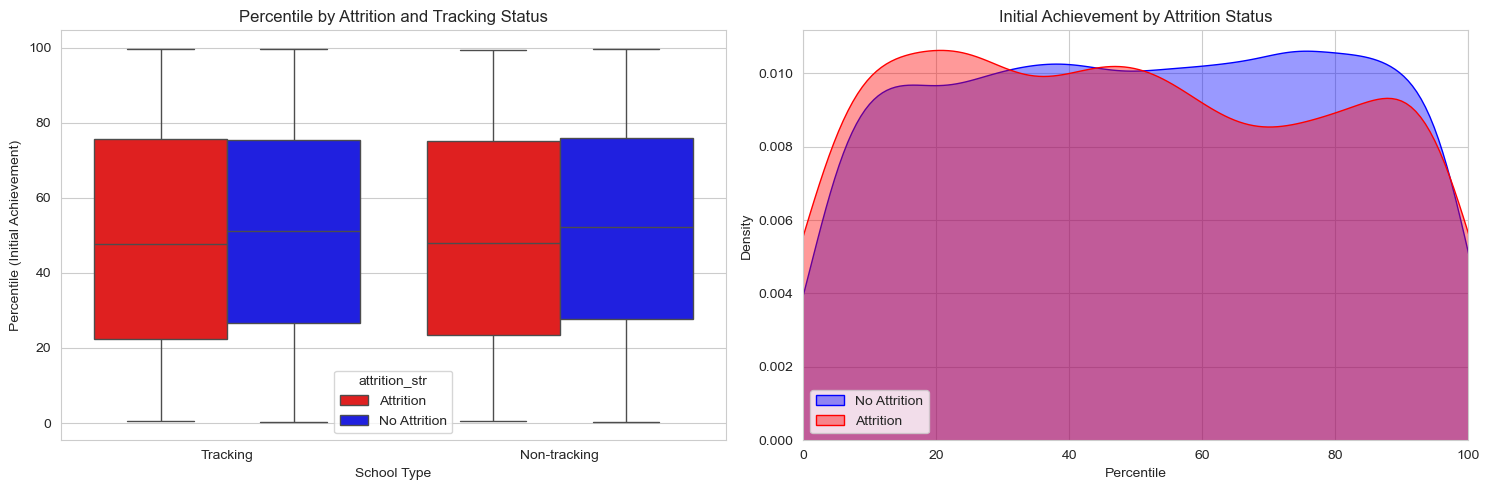

Percentile statistics by tracking and attrition status:
                             count       mean        std       min        25%  \
tracking_str attrition_str                                                      
Non-tracking Attrition       494.0  49.019493  29.438505  0.450450  23.399698   
             No Attrition   2325.0  51.729065  28.345640  0.364959  27.862597   
Tracking     Attrition       631.0  48.625267  29.772877  0.505054  22.517607   
             No Attrition   2981.0  50.825649  28.433069  0.354612  26.543213   

                                  50%        75%        max  
tracking_str attrition_str                                   
Non-tracking Attrition      48.108303  75.240479  99.375000  
             No Attrition   52.325584  76.000000  99.705879  
Tracking     Attrition      47.826088  75.775070  99.645393  
             No Attrition   51.086956  75.418991  99.683548  


In [508]:
# Analyze attrition patterns based on initial achievement
df_analysis = df.copy()

# Create tracking and attrition labels for better readability
df_analysis = df_analysis.merge(
    pd.DataFrame({'tracking': [0, 1], 'tracking_str': ['Non-tracking', 'Tracking']}),
    on='tracking', how='left'
)
df_analysis = df_analysis.merge(
    pd.DataFrame({'attrition': [0, 1], 'attrition_str': ['No Attrition', 'Attrition']}),
    on='attrition', how='left'
)

# Define colors for consistent visualization
attrition_colors = {'No Attrition': 'blue', 'Attrition': 'red'}

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot: attrition by tracking status
sns.boxplot(
    x='tracking_str', y='percentile', hue='attrition_str', 
    data=df_analysis, ax=axes[0], palette=attrition_colors
)
axes[0].set_title('Percentile by Attrition and Tracking Status')
axes[0].set_xlabel('School Type')
axes[0].set_ylabel('Percentile (Initial Achievement)')

# Density plot: attrition distribution
for attrition_val, label in {0: 'No Attrition', 1: 'Attrition'}.items():
    sns.kdeplot(
        df_analysis[df_analysis['attrition'] == attrition_val]['percentile'], 
        label=label, ax=axes[1], fill=True, alpha=0.4, color=attrition_colors[label]
    )
axes[1].set_title('Initial Achievement by Attrition Status')
axes[1].set_xlabel('Percentile')
axes[1].set_xlim(0, 100)  # Set x-axis limits to keep percentile in range 0-100
axes[1].legend()

plt.tight_layout()
plt.show()

# Summary statistics
print("Percentile statistics by tracking and attrition status:")
print(df_analysis.groupby(['tracking_str', 'attrition_str'])['percentile'].describe())










A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


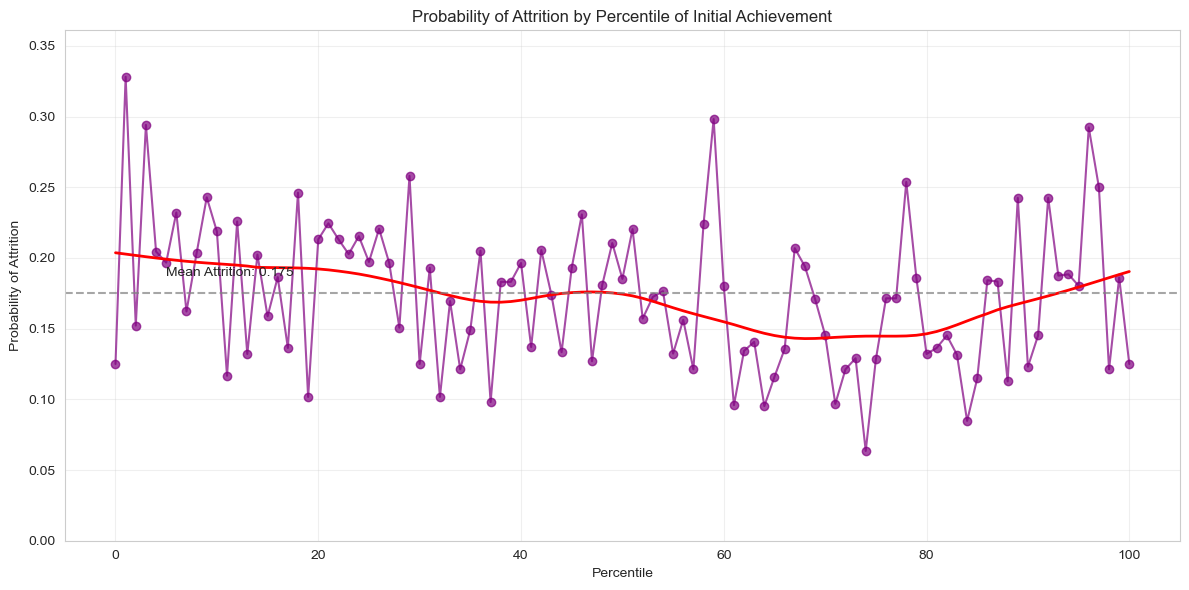

Number of students with valid percentile data: 6431
Number of students with missing percentile data: 591

Attrition probability by percentile (showing every 10th percentile):
     Percentile  Attrition_Probability
0             0               0.125000
10           10               0.218750
20           20               0.213115
30           30               0.125000
40           40               0.196429
50           50               0.185185
60           60               0.180000
70           70               0.145455
80           80               0.132075
90           90               0.123077
100         100               0.125000


In [510]:
# Calculate the probability of attrition by percentile
# First, handle missing values in percentile
df_analysis_clean = df_analysis.dropna(subset=['percentile'])

# Round percentiles to integers to create bins
df_analysis_clean['percentile_int'] = df_analysis_clean['percentile'].round().astype(int)

# Group by percentile and calculate attrition rate
attrition_by_percentile = df_analysis_clean.groupby('percentile_int')['attrition'].mean().reset_index()
attrition_by_percentile.columns = ['Percentile', 'Attrition_Probability']

# Create visualization
plt.figure(figsize=(12, 6))
plt.plot(attrition_by_percentile['Percentile'], attrition_by_percentile['Attrition_Probability'], 
         marker='o', linestyle='-', color='purple', alpha=0.7)

# Add smoothed trend line using LOWESS
from statsmodels.nonparametric.smoothers_lowess import lowess
smoothed = lowess(attrition_by_percentile['Attrition_Probability'], 
                 attrition_by_percentile['Percentile'], frac=0.3)
plt.plot(smoothed[:, 0], smoothed[:, 1], 'r-', linewidth=2)

plt.title('Probability of Attrition by Percentile of Initial Achievement')
plt.xlabel('Percentile')
plt.ylabel('Probability of Attrition')
plt.grid(True, alpha=0.3)
plt.ylim(0, max(attrition_by_percentile['Attrition_Probability']) * 1.1)  # Set y-axis limit with some padding

# Add horizontal line at mean attrition rate
mean_attrition = df_analysis_clean['attrition'].mean()
plt.axhline(y=mean_attrition, color='gray', linestyle='--', alpha=0.7)
plt.text(5, mean_attrition + 0.01, f'Mean Attrition: {mean_attrition:.3f}', 
         fontsize=10, verticalalignment='bottom')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Number of students with valid percentile data: {len(df_analysis_clean)}")
print(f"Number of students with missing percentile data: {len(df_analysis) - len(df_analysis_clean)}")
print("\nAttrition probability by percentile (showing every 10th percentile):")
print(attrition_by_percentile[attrition_by_percentile['Percentile'] % 10 == 0])



In [399]:
# Print unique values in administrative divisions (district is highest level, followed by division, then zone)
print("Unique values in district (highest administrative level):")
print(df['district'].unique())

print("\nUnique values in division (middle administrative level):")
print(df['division'].unique())

print("\nUnique values in zone (lowest administrative level):")
print(df['zone'].unique())


Unique values in district (highest administrative level):
['BUNGOMA' 'BUTERE/M']

Unique values in division (middle administrative level):
['KANDUYI' 'BUTERE' 'KHWISERO' 'MATUNGU' 'MUMIAS' 'S. WANGA' 'BUMULA']

Unique values in zone (lowest administrative level):
['MUNICIPALITY' 'SANGALO' 'BUTERE EAST' 'BUTERE WEST' 'KHWISERO WEST'
 'MATUNGU' 'MUMIAS EAST' 'SOUTH WANGA' 'KABULA']


In [400]:
# Clean age variable
# First impute missing agetest with r2_age - 1
df['agetest'] = np.where(df['agetest'].isna(), df['r2_age'] - 1, df['agetest'])

# For any remaining missing values in agetest, fill with the mean age of the student's school
# First calculate the mean age by school
school_mean_age = df.groupby('schoolid')['agetest'].transform('mean')

# Then fill any remaining NaN values with the school mean
df['agetest'] = df['agetest'].fillna(school_mean_age)

# Denote any missing gender (girl) values as 2 (as contra to 0 and 1)
df['girl'] = df['girl'].fillna(2)

# Standardize test scores
test_score_vars = ['litscore', 'mathscoreraw', 'totalscore']

# Create a dictionary to store all standardized variables
std_vars_dict = {}

# Calculate standardized values for each test score variable
for var in test_score_vars:
    if var in df.columns:
        # Calculate mean and standard deviation for control group (tracking==0)
        meancomp = df.loc[df['tracking'] == 0, var].mean()
        sdcomp = df.loc[df['tracking'] == 0, var].std()
        
        # Store standardized variable in dictionary
        std_vars_dict[f'stdR_{var}'] = (df[var] - meancomp) / sdcomp

# Join all standardized columns at once to avoid fragmentation
df = pd.concat([df, pd.DataFrame(std_vars_dict)], axis=1)


In [401]:
# Display first 5 rows with all columns
pd.set_option('display.max_columns', None)
df.head()

,pupilid,schoolid,district,bungoma,division,zone,tracking,sbm,girl,agetest,etpteacher,lowstream,stream_meanpercentile,SDstream_std_mark,MEANstream_std_mark,bottomhalf,tophalf,bottomquarter,secondquarter,thirdquarter,topquarter,std_mark,percentile,realpercentile,quantile5p,attrition,w_correct,w_incorrect,w_missing,w_blanks,s_correct,s_incorrect,s_missing,s_blanks,a1_correct,a2_correct,a3_correct,a4_correct,a5_correct,a6_correct,a7_correct,a8_correct,spelling_correct,l_hr,l_min,l_tried,l_errors,l_time,wordscore,sentscore,letterscore,letterscoreraw,spellscore,sentscore24,letterscore24,spellscore24,litscore,additions_score,substractions_score,multiplications_score,mathscoreraw,totalscore,rMEANstream_std_baselinemark,rSDstream_std_baselinemark,rMEANstream_std_total,rSDstream_std_total,rMEANstream_std_math,rSDstream_std_math,rMEANstream_std_lit,rSDstream_std_lit,r2_attrition,r2_age,r2_w_correct,r2_w_incorrect,r2_w_missing,r2_s_correct,r2_s_incorrect,r2_s_missing,r2_a1_correct,r2_a2_correct,r2_a3_correct,r2_a4_correct,r2_a5_correct,r2_a6_correct,r2_a7_correct,r2_a8_correct,r2_spelling_correct,r2_l_hr,r2_l_min,r2_l_tried,r2_l_errors,r2_l_time,r2_wordscore,r2_sentscore,r2_letterscore,r2_letterscoreraw,r2_spellscore,r2_sentscore24,r2_letterscore24,r2_spellscore24,r2_litscore,r2_mathscoreraw,r2_additions_score,r2_substractions_score,r2_multiplications_score,r2_totalscore,stdR_litscore,stdR_mathscoreraw,stdR_totalscore
0,4301001,430.0,BUNGOMA,1.0,KANDUYI,MUNICIPALITY,1.0,1.0,0.0,7.0,0.0,1.0,25.115055,0.669245,-0.81929,1.0,0.0,1.0,0.0,0.0,0.0,-2.340687,0.641024,1.0,1.0,1.0,NaN,NaN,NaN,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.835033,0.648841,-0.312169,0.713934,-0.267559,0.979023,-0.267743,0.480582,0.0,8.0,14.0,10.0,0.0,24.0,16.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,3.0,0.0,NaN,NaN,4.0,8.0,0.0,NaN,0.0,4.8,0.0,0.0,2.20,5.0,3.0,2.0,0.0,7.20,NaN,NaN,NaN
1,4301002,430.0,BUNGOMA,1.0,KANDUYI,MUNICIPALITY,1.0,1.0,1.0,12.0,0.0,1.0,25.115055,0.669245,-0.81929,1.0,0.0,1.0,0.0,0.0,0.0,-2.256832,1.923078,2.0,1.0,1.0,NaN,NaN,NaN,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.833910,0.652676,-0.312169,0.713934,-0.267559,0.979023,-0.267743,0.480582,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4301003,430.0,BUNGOMA,1.0,KANDUYI,MUNICIPALITY,1.0,1.0,1.0,8.0,0.0,1.0,25.115055,0.669245,-0.81929,1.0,0.0,1.0,0.0,0.0,0.0,-2.145025,3.205132,4.0,1.0,0.0,8.0,16.0,0.0,,18.0,12.0,10.0,,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,49.0,0.0,0.0,NaN,0.0,6.0,0.0,NaN,0.0,3.6,0.000000,0.0,0.900000,1.0,1.0,0.0,2.0,2.900000,-0.832559,0.657308,-0.302533,0.704503,-0.252555,0.975930,-0.263220,0.478208,0.0,8.0,8.0,16.0,0.0,16.0,9.0,15.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,44.0,0.0,0.0,NaN,0.0,7.0,0.0,NaN,0.0,4.2,0.0,0.0,1.05,2.0,1.0,1.0,0.0,3.05,-0.749062,-1.130950,-1.038404
3,4301004,430.0,BUNGOMA,1.0,KANDUYI,MUNICIPALITY,1.0,1.0,0.0,14.0,0.0,1.0,25.115055,0.669245,-0.81929,1.0,0.0,1.0,0.0,0.0,0.0,-1.879484,4.487181,5.0,1.0,0.0,0.0,9.0,15.0,,2.0,1.0,37.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,16.0,10.0,9.0,NaN,0.0,1.0,1.0,1.0,0.0,0.6,0.342857,0.0,0.235714,0.0,0.0,0.0,0.0,0.235714,-0.829999,0.666239,-0.298949,0.683648,-0.247568,0.954491,-0.261131,0.472176,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.870466,-1.561308,-1.334100
4,4301005,430.0,BUNGOMA,1.0,KANDUYI,MUNICIPALITY,1.0,1.0,0.0,11.0,0.0,1.0,25.115055,0.669245,-0.81929,1.0,0.0,1.0,0.0,0.0,0.0,-1.809605,5.769229,6.0,2.0,0.0,8.0,16.0,0.0,,4.0,11.0,25.0,,2.0,3.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,12.0,28.0,18.0,8.0,NaN,0.0,0.0,10.0,10.0,0.0,0.0,3.428571,0.0,0.857143,4.0,5.0,0.0,9.0,9.857142,-0.829473,0.668133,-0.316660,0.720719,-0.285349,0.9775

In [417]:
# Count the number of unique schools in the dataset
num_unique_schools = df['schoolid'].nunique()
print(f"Number of unique schools: {num_unique_schools}")

# Count unique schools by tracking status
tracking_schools = df[df['tracking'] == 1]['schoolid'].nunique()
non_tracking_schools = df[df['tracking'] == 0]['schoolid'].nunique()
print(f"Number of tracking schools: {tracking_schools}")
print(f"Number of non-tracking schools: {non_tracking_schools}")

# Count tracking schools by Bungoma district status
tracking_bungoma = df[(df['tracking'] == 1) & (df['bungoma'] == 1)]['schoolid'].nunique()
tracking_non_bungoma = df[(df['tracking'] == 1) & (df['bungoma'] == 0)]['schoolid'].nunique()
print(f"Number of tracking schools in Bungoma: {tracking_bungoma}")
print(f"Number of tracking schools outside Bungoma: {tracking_non_bungoma}")


Number of unique schools: 121
Number of tracking schools: 60
Number of non-tracking schools: 61
Number of tracking schools in Bungoma: 16
Number of tracking schools outside Bungoma: 44


In [403]:
# Keep relevant variables for the analysis at hand
vars_to_keep = ['pupilid', 
                'schoolid',
                'bungoma',
                'tracking',
                'girl',
                'agetest',
                'etpteacher',
                'percentile', 
                'bottomhalf', 
                'tophalf', 
                'bottomquarter', 
                'secondquarter', 
                'thirdquarter', 
                'topquarter',
                'stdR_litscore',
                'stdR_mathscoreraw',
                'stdR_totalscore']

df = df[vars_to_keep]

df.head()

,pupilid,schoolid,bungoma,tracking,girl,agetest,etpteacher,percentile,bottomhalf,tophalf,bottomquarter,secondquarter,thirdquarter,topquarter,stdR_litscore,stdR_mathscoreraw,stdR_totalscore
0,4301001,430.0,1.0,1.0,0.0,7.0,0.0,0.641024,1.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
1,4301002,430.0,1.0,1.0,1.0,12.0,0.0,1.923078,1.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
2,4301003,430.0,1.0,1.0,1.0,8.0,0.0,3.205132,1.0,0.0,1.0,0.0,0.0,0.0,-0.749062,-1.130950,-1.038404
3,4301004,430.0,1.0,1.0,0.0,14.0,0.0,4.487181,1.0,0.0,1.0,0.0,0.0,0.0,-0.870466,-1.561308,-1.334100
4,4301005,430.0,1.0,1.0,0.0,11.0,0.0,5.769229,1.0,0.0,1.0,0.0,0.0,0.0,-0.756894,0.375301,-0.266265


In [404]:
df_1 = df[df['stdR_totalscore'].notna() & df['percentile'].notna()]

In [405]:
# Display descriptive statistics
df_1.describe()

,pupilid,schoolid,bungoma,tracking,girl,agetest,etpteacher,percentile,bottomhalf,tophalf,bottomquarter,secondquarter,thirdquarter,topquarter,stdR_litscore,stdR_mathscoreraw,stdR_totalscore
count,5.304000e+03,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000
mean,7.756946e+06,775.589722,0.256976,0.561840,0.496795,9.316017,0.502828,51.217537,0.487745,0.512255,0.229827,0.251885,0.257353,0.260935,0.069296,0.063406,0.074588
std,1.756451e+06,175.645020,0.437009,0.496209,0.507527,1.459263,0.500035,28.395777,0.499903,0.499903,0.420749,0.434150,0.437209,0.439194,1.010736,0.990852,1.005110
min,4.301003e+06,430.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.354612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.913546,-1.561308,-1.360261
25%,6.851084e+06,685.000000,0.000000,0.000000,0.000000,8.000000,0.000000,27.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.666820,-0.700593,-0.721304
50%,7.901002e+06,790.000000,0.000000,1.000000,0.000000,9.000000,1.000000,51.648350,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.352212,0.160122,-0.123570
75%,9.381236e+06,938.000000,1.000000,1.000000,1.000000,10.000000,1.000000,75.680367,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.556366,0.805659,0.692170
max,1.020106e+07,1020.000000,1.000000,1.000000,2.000000,19.000000,1.000000,99.705879,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.402198,3.602982,3.381972


In [406]:
print("\nMissing values by column:")
print(df_1.isna().sum())


Missing values by column:
pupilid              0
schoolid             0
bungoma              0
tracking             0
girl                 0
agetest              0
etpteacher           0
percentile           0
bottomhalf           0
tophalf              0
bottomquarter        0
secondquarter        0
thirdquarter         0
topquarter           0
stdR_litscore        0
stdR_mathscoreraw    0
stdR_totalscore      0
dtype: int64


In [407]:
# Create interaction terms between tracking and student characteristics
df_1 = df_1.assign(
    girl_tracking = df_1['girl'] * df_1['tracking'],
    bottomquarter_tracking = df_1['bottomquarter'] * df_1['tracking'],
    secondquarter_tracking = df_1['secondquarter'] * df_1['tracking'],
    thirdquarter_tracking = df_1['thirdquarter'] * df_1['tracking'],
    topquarter_tracking = df_1['topquarter'] * df_1['tracking']
)

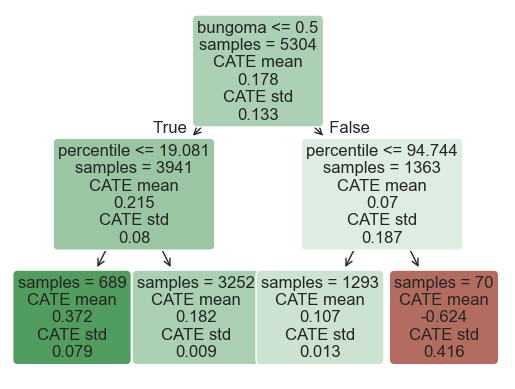

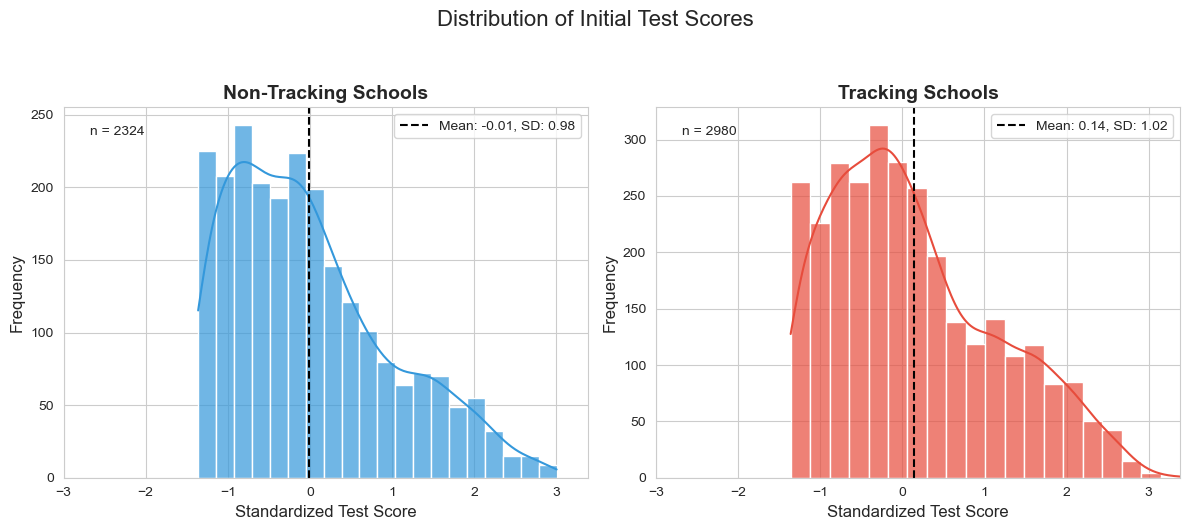

In [408]:
# Create a new column for tracking group
df_1['trackinggroup'] = 'Non-Tracking Schools'
df_1.loc[df_1['tracking'] == 1, 'trackinggroup'] = 'Tracking Schools'

# Set a consistent style
sns.set_style('whitegrid')

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define colors
colors = ['#3498db', '#e74c3c']  # Blue for non-tracking, red for tracking

# Plot histograms for each tracking group with improved styling
for i, group in enumerate(['Non-Tracking Schools', 'Tracking Schools']):
    subset = df_1[df_1['trackinggroup'] == group]
    data = subset['stdR_totalscore'].dropna()
    
    # Plot histogram with KDE
    sns.histplot(data, bins=20, kde=True, ax=axes[i], color=colors[i], alpha=0.7)
    
    # Add mean line
    mean_val = data.mean()
    std_val = data.std()
    axes[i].axvline(mean_val, color='black', linestyle='--', 
                   linewidth=1.5, label=f'Mean: {mean_val:.2f}, SD: {std_val:.2f}')
    
    # Add labels and title
    axes[i].set_title(group, fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Standardized Test Score', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].legend()
    
    # Add count information
    axes[i].text(0.05, 0.95, f'n = {len(data)}', 
                transform=axes[i].transAxes, 
                fontsize=10, verticalalignment='top')

# Add overall title
fig.suptitle('Distribution of Initial Test Scores', fontsize=16, y=1.05)

# Ensure the axes have the same scale for better comparison
x_min = min(df_1['stdR_totalscore'].dropna().min(), -3)
x_max = max(df_1['stdR_totalscore'].dropna().max(), 3)
for ax in axes:
    ax.set_xlim(x_min, x_max)

plt.tight_layout()
plt.savefig('figI.png', dpi=300, bbox_inches='tight')
plt.show()

# Drop the temporary column
df_1.drop('trackinggroup', axis=1, inplace=True)

In [409]:
# Define dependent variables to analyze
dependent_vars = ['stdR_totalscore', 'stdR_litscore', 'stdR_mathscoreraw']

# Create a dictionary to store results
results_dict = {}
# Run linear regression models for each dependent variable
for dv in dependent_vars:
    # Define the formula with the current dependent variable
    formula = f'{dv} ~ tracking + ' \
              'bottomquarter + bottomquarter_tracking + secondquarter + ' \
              'secondquarter_tracking + topquarter + topquarter_tracking + ' \
              'girl + percentile + agetest + etpteacher'
    
    # Run the model
    model = smf.ols(formula=formula, data=df_1)
    results = model.fit()
    
    # Get robust standard errors clustered at schoolid level
    results_robust = results.get_robustcov_results(cov_type='cluster', 
                                                  groups=df_1['schoolid'],
                                                  use_t=True)
    
    # Store the results
    results_dict[dv] = results_robust
    
    # Display the results with robust standard errors
    print(f"\n\n=== Results for {dv} ===\n")
    print(results_robust.summary().tables[1])




=== Results for stdR_totalscore ===

                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.0505      0.162     -6.485      0.000      -1.371      -0.729
tracking                   0.1834      0.092      1.990      0.049       0.001       0.366
bottomquarter              0.3703      0.084      4.401      0.000       0.204       0.537
bottomquarter_tracking    -0.0500      0.079     -0.636      0.526      -0.206       0.106
secondquarter              0.2349      0.055      4.293      0.000       0.126       0.343
secondquarter_tracking    -0.0184      0.067     -0.273      0.785      -0.152       0.115
topquarter                 0.0038      0.070      0.055      0.956      -0.134       0.142
topquarter_tracking        0.0262      0.076      0.347      0.730      -0.123       0.176
girl                       0.0845      0.027      3

In [410]:
# Get the column names from df_dummies and add other features
X = ['girl', 'agetest', 'percentile']


In [411]:
from sklearn.linear_model import LogisticRegression

# Increase max_iter to avoid convergence warning
df_1['pscore'] = LogisticRegression(max_iter=1000, solver='liblinear').fit(df_1[X], df_1['tracking']).predict_proba(df_1[X])[:,1]

# Calculate mean and standard deviation for each tracking group
tracking_0 = df_1[df_1['tracking'] == 0]['pscore']
tracking_1 = df_1[df_1['tracking'] == 1]['pscore']

print(f"Tracking 0 (Non-tracked): Mean = {tracking_0.mean():.4f}, SD = {tracking_0.std():.4f}")
print(f"Tracking 1 (Tracked): Mean = {tracking_1.mean():.4f}, SD = {tracking_1.std():.4f}")

# Plot histogram
sns.histplot(data=df_2, x='pscore', hue='tracking').set(
    title='Predicted propensity scores', xlim=[0,1], xlabel='Propensity Score');

Tracking 0 (Non-tracked): Mean = 0.5573, SD = 0.0441
Tracking 1 (Tracked): Mean = 0.5657, SD = 0.0448


In [412]:
# Count the number of pupils by tracking status
tracking_counts = df_1.groupby('tracking')['pupilid'].count()
print("Number of pupils by tracking status:")
print(f"Tracking 0 (Non-tracked): {tracking_counts.get(0.0, 0)}")
print(f"Tracking 1 (Tracked): {tracking_counts.get(1.0, 0)}")
print(f"Total: {df_1['pupilid'].count()}")

# Calculate the proportion of tracked students
total_pupils = df_1['pupilid'].count()
tracked_proportion = tracking_counts.get(1.0, 0) / total_pupils if total_pupils > 0 else 0
print(f"\nProportion of tracked students: {tracked_proportion:.4f} ({tracked_proportion*100:.2f}%)")

Number of pupils by tracking status:
Tracking 0 (Non-tracked): 2324
Tracking 1 (Tracked): 2980
Total: 5304

Proportion of tracked students: 0.5618 (56.18%)


In [468]:
from econml.dml import CausalForestDML

np.random.seed(0)
tree_model = CausalForestDML(n_estimators=1, subforest_size=1, inference=False, max_depth=5)
# Fix the syntax for selecting multiple columns from df_1
tree_model = tree_model.fit(Y=df_1["stdR_totalscore"], 
                           X=df_1[['girl', 'agetest', 'percentile', 'bungoma', 'etpteacher']], 
                           T=df_1['tracking'])

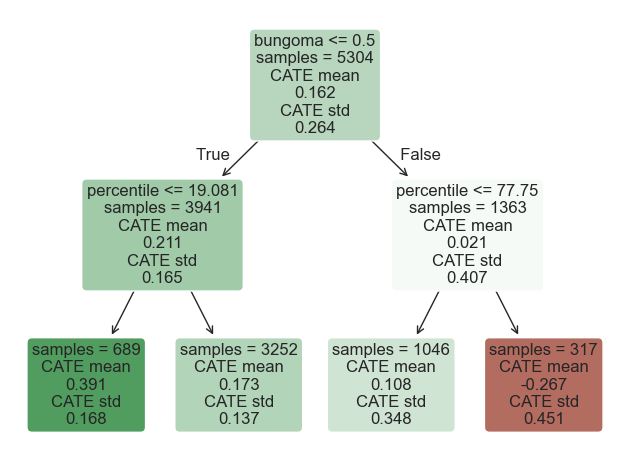

In [469]:
from econml.cate_interpreter import SingleTreeCateInterpreter
# Fix the DataFrame indexing syntax
intrp = SingleTreeCateInterpreter(max_depth=2).interpret(tree_model, df_1[['girl', 'agetest', 'percentile', 'bungoma', 'etpteacher']])
fig = intrp.plot(feature_names=['girl', 'agetest', 'percentile', 'bungoma', 'etpteacher'], fontsize=12)
# Don't create a new figure to avoid the empty axes
plt.tight_layout()  # Improve spacing
plt.show()  # Explicitly show the plot

In [426]:
from econml.grf import CausalForest, CausalIVForest, RegressionForest
from econml.dml import CausalForestDML

In [427]:
est = CausalForest(criterion='het', n_estimators=400, min_samples_leaf=5, max_depth=None,
                   min_var_fraction_leaf=None, min_var_leaf_on_val=True,
                   min_impurity_decrease = 0.0, max_samples=0.45, min_balancedness_tol=.45,
                   warm_start=False, inference=True, fit_intercept=True, subforest_size=4,
                   honest=True, verbose=0, n_jobs=-1, random_state=1235)

In [432]:
# Split data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_1, test_size=0.2, random_state=42)

# Define X (features), T (treatment), and Y (outcome) for both train and test sets
X_train = train_df[['girl', 'agetest', 'percentile', 'bungoma', 'etpteacher']]
T_train = train_df['tracking']
Y_train = train_df['stdR_totalscore']

X_test = test_df[['girl', 'agetest', 'percentile', 'bungoma', 'etpteacher']]
T_test = test_df['tracking']
Y_test = test_df['stdR_totalscore']

In [433]:
est.fit(X_train,
        T_train,
        Y_train)

CausalForest(criterion='het', min_var_leaf_on_val=True, n_estimators=400,
             random_state=1235)

In [434]:
point, lb, ub = est.predict(X_test, interval=True, alpha=0.01)

In [435]:
point = est.predict(X_test)

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

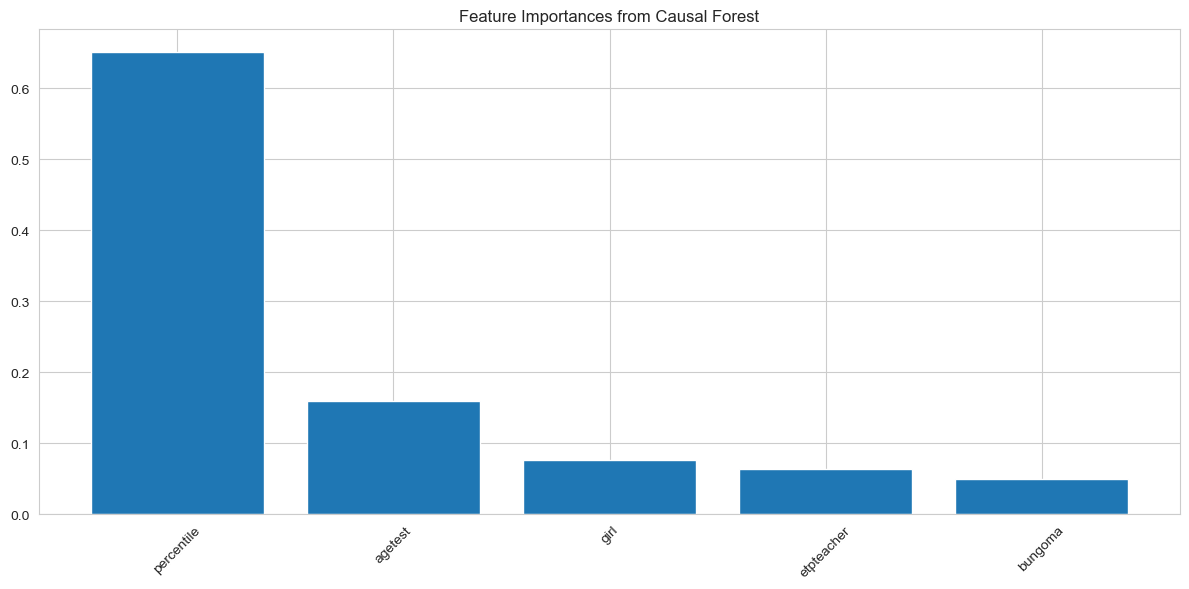

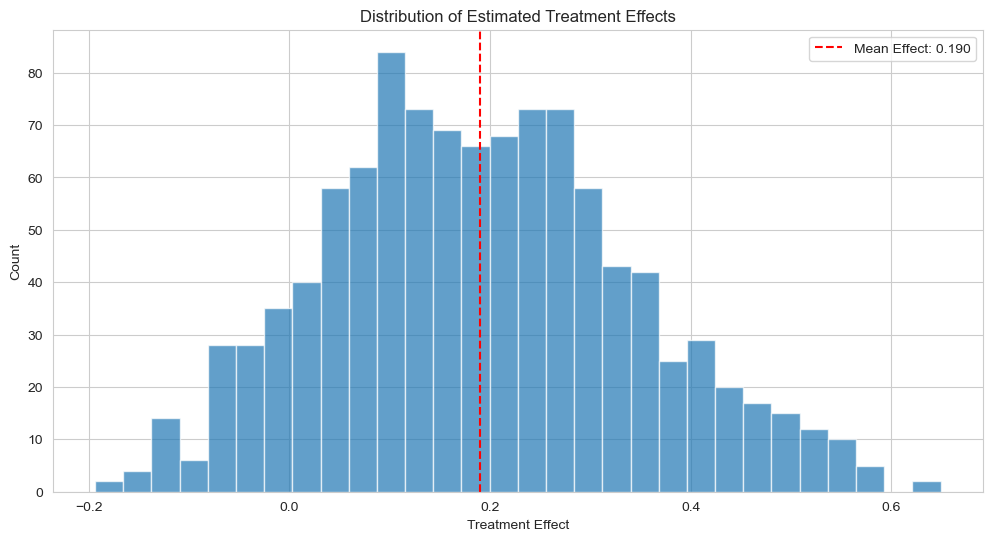

In [443]:
# The CausalForest trees are not compatible with sklearn's plot_tree
# Let's visualize the feature importances instead
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = est.feature_importances_

# Create a bar chart of feature importances
plt.figure(figsize=(12, 6))
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]
plt.bar(range(len(feature_importances)), feature_importances[indices])
plt.xticks(range(len(feature_importances)), features[indices], rotation=45)
plt.title('Feature Importances from Causal Forest')
plt.tight_layout()
plt.show()

# Let's also look at the treatment effects
plt.figure(figsize=(12, 6))
plt.hist(point, bins=30, alpha=0.7)
plt.axvline(x=np.mean(point), color='red', linestyle='--', 
           label=f'Mean Effect: {np.mean(point):.3f}')
plt.title('Distribution of Estimated Treatment Effects')
plt.xlabel('Treatment Effect')
plt.ylabel('Count')
plt.legend()
plt.show()

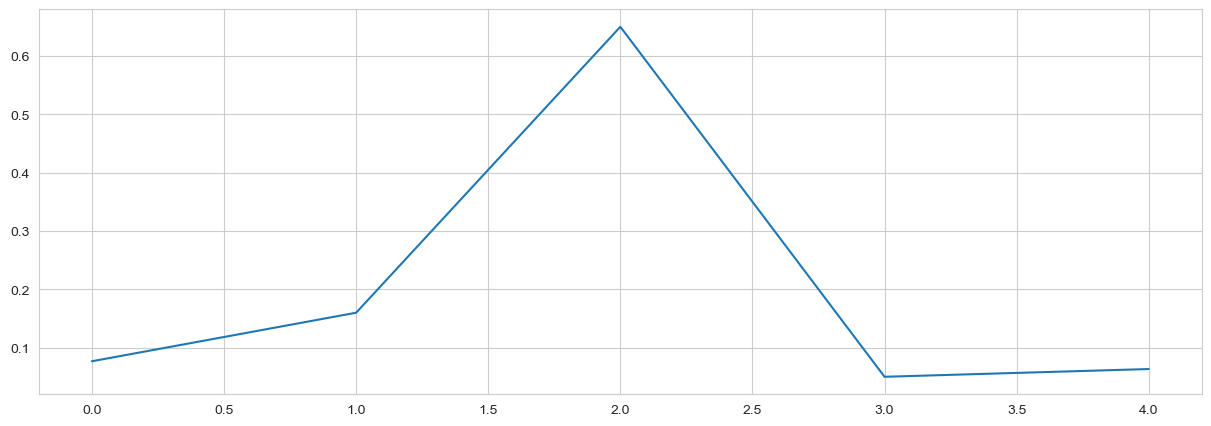

In [445]:
plt.figure(figsize=(15,5))
plt.plot(est.feature_importances(max_depth=4, depth_decay_exponent=2.0))
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


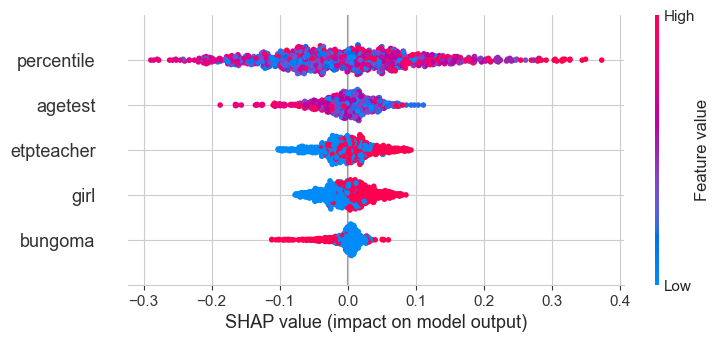

In [450]:
import shap
# Convert X to a numpy array or DataFrame if it's a list
X_for_shap = X_test
# Use TreeExplainer with check_additivity=False to avoid the additivity error
explainer = shap.TreeExplainer(est, check_additivity=False)
shap_values = explainer(X_for_shap)
shap.plots.beeswarm(shap_values)

In [517]:
# Get predictions with confidence intervals at 1% significance level
point_predictions, lower_bounds, upper_bounds = est.predict(X_test, interval=True, alpha=0.01)

# Display the first few predictions in a readable format
print("Sample of predictions (point estimate, lower bound, upper bound):")
for i in range(min(5, len(point_predictions))):
    print(f"Sample {i}: {point_predictions[i][0]:.6f}, [{lower_bounds[i][0]:.6f}, {upper_bounds[i][0]:.6f}]")

# Print shapes to understand the output structure
print(f"\nShapes - Point: {point_predictions.shape}, Lower: {lower_bounds.shape}, Upper: {upper_bounds.shape}")

# Return the predictions for further use
point_predictions, lower_bounds, upper_bounds

Sample of predictions (point estimate, lower bound, upper bound):
Sample 0: 0.210918, [0.011972, 0.409864]
Sample 1: 0.275236, [-0.144784, 0.695256]
Sample 2: 0.151965, [-0.153961, 0.457890]
Sample 3: 0.158455, [-0.031202, 0.348112]
Sample 4: 0.424601, [0.017336, 0.831866]

Shapes - Point: (1061, 1), Lower: (1061, 1), Upper: (1061, 1)


(array([[0.21091776],
        [0.27523611],
        [0.1519648 ],
        ...,
        [0.10651751],
        [0.23340151],
        [0.12425752]]),
 array([[ 0.01197151],
        [-0.14478393],
        [-0.15396054],
        ...,
        [-0.28548175],
        [-0.02041878],
        [-0.21115914]]),
 array([[0.40986402],
        [0.69525615],
        [0.45789014],
        ...,
        [0.49851677],
        [0.48722181],
        [0.45967418]]))

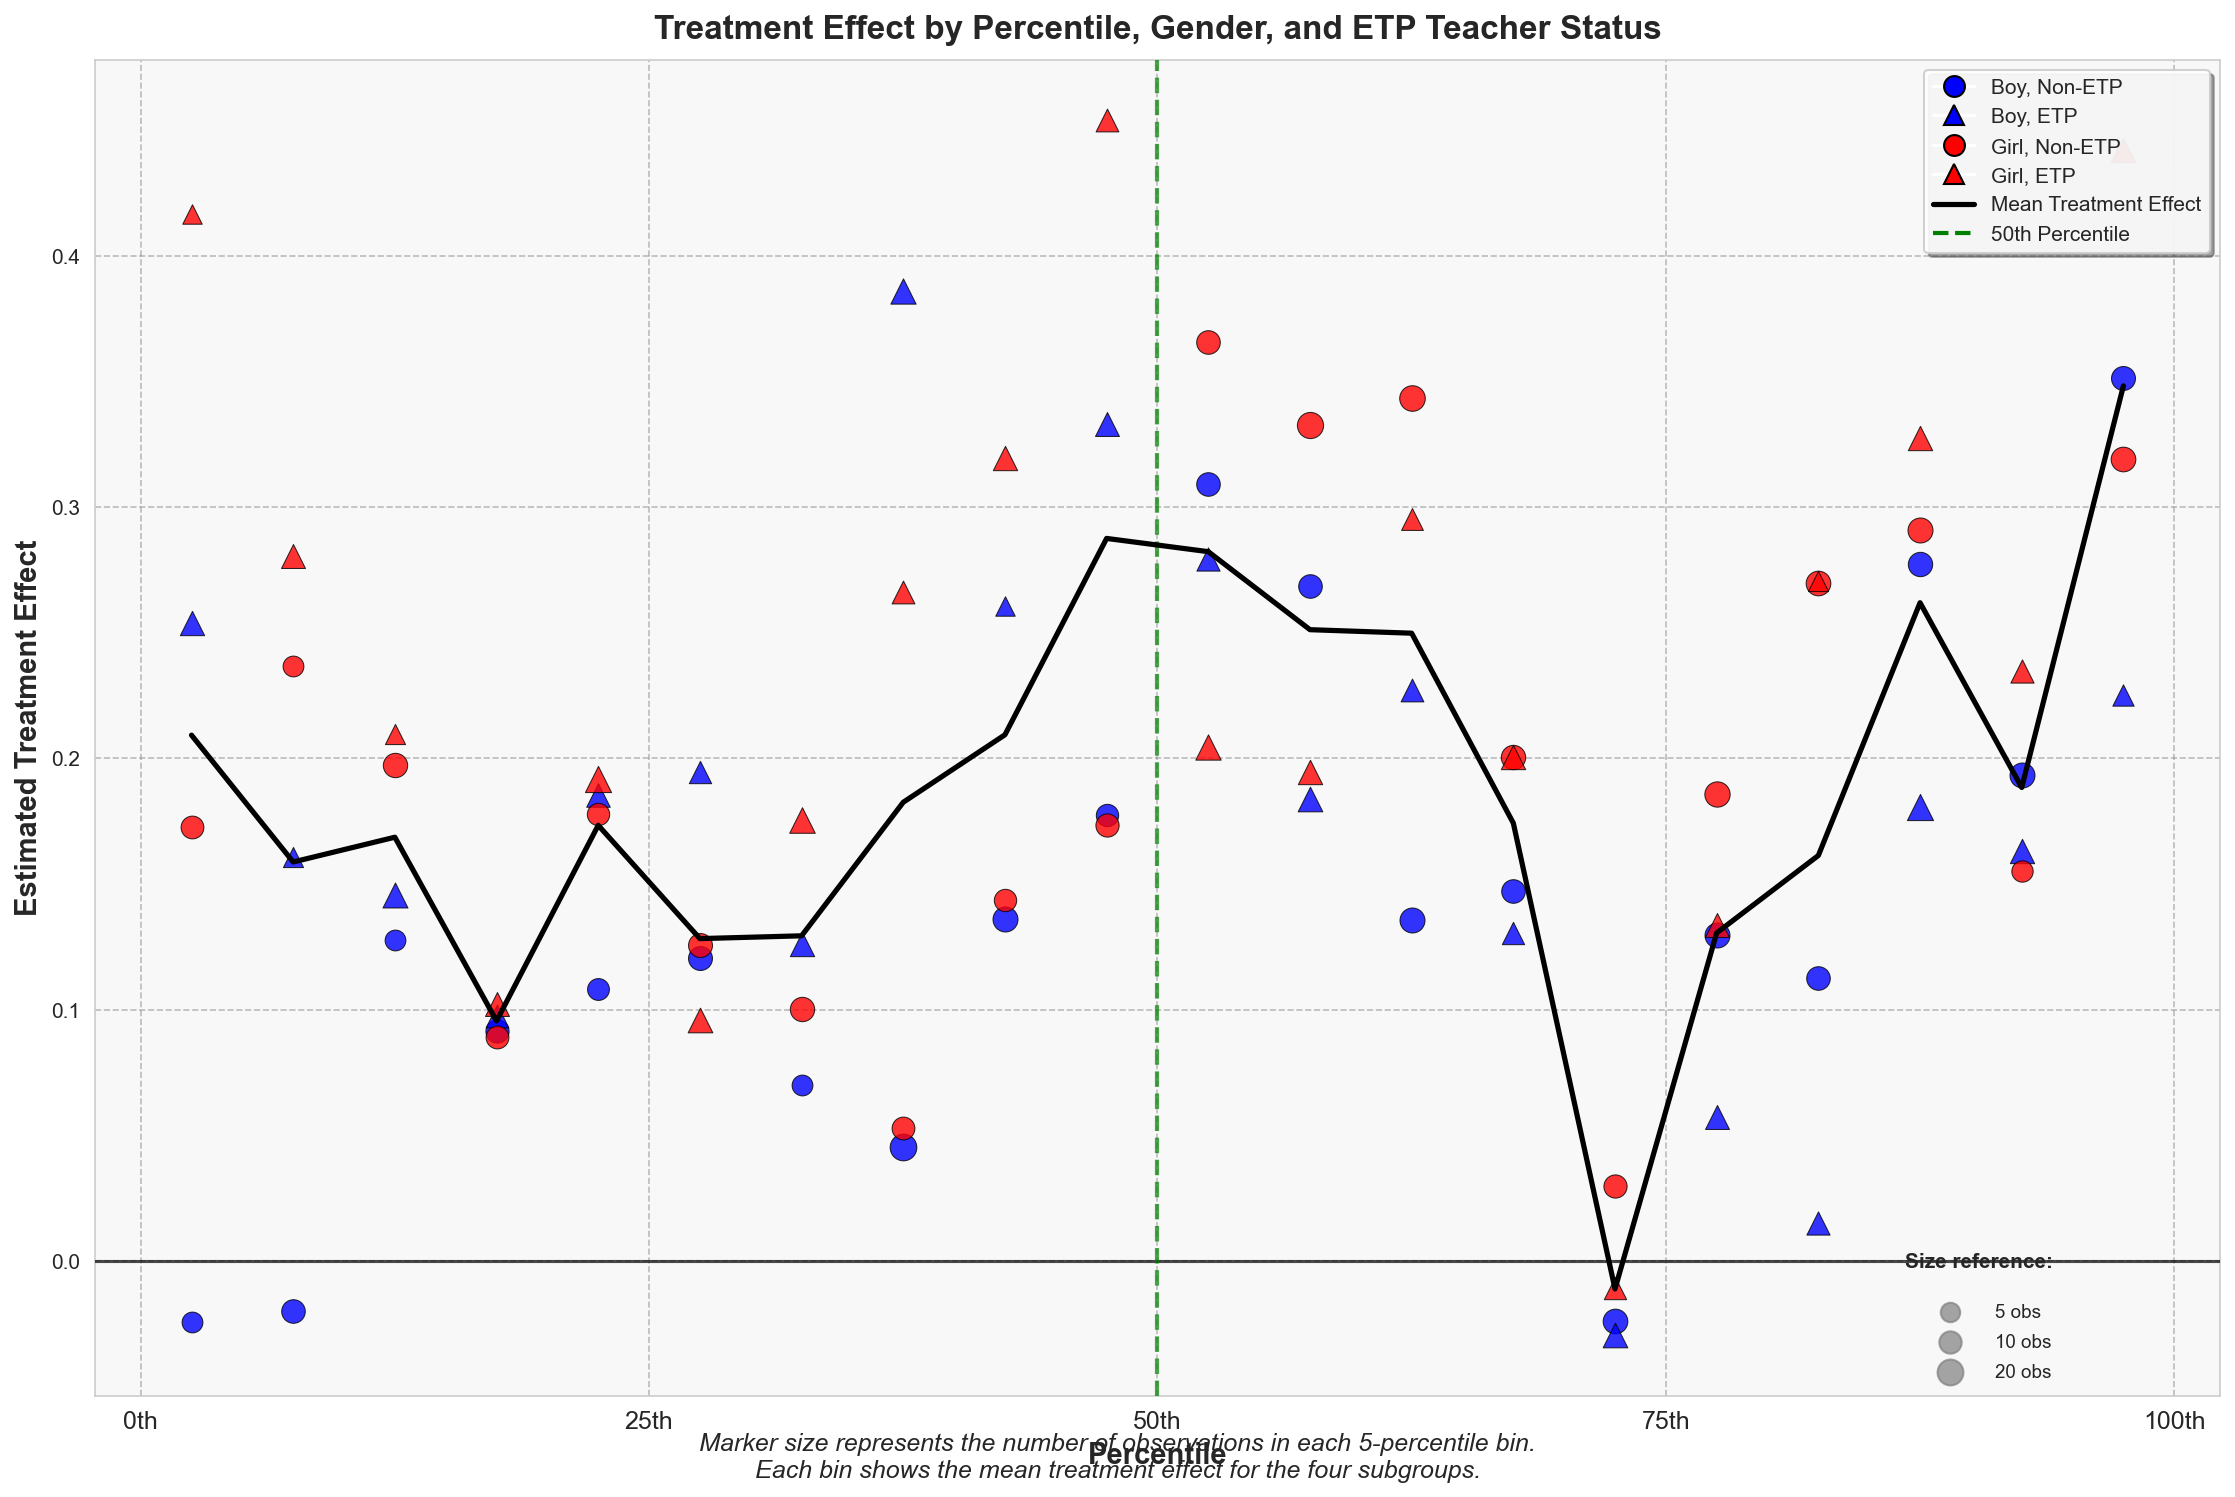

In [542]:
# Get treatment effects with confidence intervals for test set
point_test, lower_test, upper_test = est.predict(X_test, interval=True, alpha=0.1)  # 90% CI (alpha=0.1)

# Flatten arrays for easier handling
point_test = point_test.flatten()
lower_test = lower_test.flatten()
upper_test = upper_test.flatten()

# Identify observations with statistically significant effects (different from zero)
sig_test = (lower_test > 0) | (upper_test < 0)  # Effect is significant if CI doesn't include zero

# Create a figure for the percentile analysis
plt.figure(figsize=(15, 10), dpi=150)
ax = plt.gca()

# Set background color for better contrast
ax.set_facecolor('#f8f8f8')

# Create a DataFrame for easier analysis
df = pd.DataFrame({
    'percentile': X_test['percentile'].values,
    'point': point_test,
    'lower': lower_test,
    'upper': upper_test,
    'significant': sig_test,
    'gender': X_test['girl'].values,
    'etpteacher': X_test['etpteacher'].values
})

# Define percentile bins (5% width)
percentile_bins = np.arange(0, 101, 5)
bin_centers = [(percentile_bins[i] + percentile_bins[i+1])/2 for i in range(len(percentile_bins)-1)]

# Initialize lists to store data for plotting
mean_effects = []
# Four groups: boy-nonetp, boy-etp, girl-nonetp, girl-etp
sizes_groups = [[] for _ in range(4)]
mean_groups = [[] for _ in range(4)]

# Calculate statistics for each percentile bin
for i in range(len(percentile_bins)-1):
    bin_start = percentile_bins[i]
    bin_end = percentile_bins[i+1]
    
    # Filter points in this bin
    in_bin = (df['percentile'] >= bin_start) & (df['percentile'] < bin_end)
    bin_data = df[in_bin]
    
    if len(bin_data) > 0:
        # Calculate overall mean effect for this bin
        mean_effects.append(bin_data['point'].mean())
        
        # Calculate for each of the 4 groups
        # Group 0: Boys, Non-ETP
        subgroup = bin_data[(bin_data['gender'] == 0) & (bin_data['etpteacher'] == 0)]
        sizes_groups[0].append(len(subgroup))
        mean_groups[0].append(subgroup['point'].mean() if len(subgroup) > 0 else np.nan)
        
        # Group 1: Boys, ETP
        subgroup = bin_data[(bin_data['gender'] == 0) & (bin_data['etpteacher'] == 1)]
        sizes_groups[1].append(len(subgroup))
        mean_groups[1].append(subgroup['point'].mean() if len(subgroup) > 0 else np.nan)
        
        # Group 2: Girls, Non-ETP
        subgroup = bin_data[(bin_data['gender'] == 1) & (bin_data['etpteacher'] == 0)]
        sizes_groups[2].append(len(subgroup))
        mean_groups[2].append(subgroup['point'].mean() if len(subgroup) > 0 else np.nan)
        
        # Group 3: Girls, ETP
        subgroup = bin_data[(bin_data['gender'] == 1) & (bin_data['etpteacher'] == 1)]
        sizes_groups[3].append(len(subgroup))
        mean_groups[3].append(subgroup['point'].mean() if len(subgroup) > 0 else np.nan)
    else:
        # If no data in this bin, append placeholders
        mean_effects.append(np.nan)
        for j in range(4):
            sizes_groups[j].append(0)
            mean_groups[j].append(np.nan)

# Scale factor for marker sizes (adjust as needed)
scale_factor = 30
min_size = 20

# Plot the overall mean effect line
plt.plot(bin_centers, mean_effects, 'k-', linewidth=2.5, label='Mean Treatment Effect', zorder=10)

# Define colors and markers for the four groups
colors = ['blue', 'blue', 'red', 'red']
markers = ['o', '^', 'o', '^']
group_labels = ['Boy, Non-ETP', 'Boy, ETP', 'Girl, Non-ETP', 'Girl, ETP']

# Plot markers for each group
for group_idx in range(4):
    for i in range(len(bin_centers)):
        if not np.isnan(mean_groups[group_idx][i]) and sizes_groups[group_idx][i] > 0:
            plt.scatter(bin_centers[i], mean_groups[group_idx][i], 
                       s=min_size + scale_factor * np.sqrt(sizes_groups[group_idx][i]), 
                       color=colors[group_idx], alpha=0.8, edgecolor='black', linewidth=0.5, marker=markers[group_idx],
                       label=group_labels[group_idx] if i == 0 else "")

# Add horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-', alpha=0.7, linewidth=1.5, zorder=5)

# Add vertical line at 50th percentile
plt.axvline(x=50, color='green', linestyle='--', alpha=0.7, linewidth=2, 
           label='50th percentile', zorder=5)

# Add labels and title
plt.xlabel('Percentile', fontsize=14, fontweight='bold')
plt.ylabel('Estimated Treatment Effect', fontsize=14, fontweight='bold')
plt.title('Treatment Effect by Percentile, Gender, and ETP Teacher Status', 
         fontsize=16, fontweight='bold', pad=10)

# Add subtitle explaining the visualization
plt.figtext(0.5, 0.01, 
           'Marker size represents the number of observations in each 5-percentile bin.\n'
           'Each bin shows the mean treatment effect for the four subgroups.',
           ha='center', fontsize=12, fontstyle='italic')

# Improve grid visibility
plt.grid(True, linestyle='--', alpha=0.5, color='gray')

# Set x-axis ticks
plt.xticks([0, 25, 50, 75, 100], ['0th', '25th', '50th', '75th', '100th'], fontsize=12)

# Create custom legend with marker shapes and colors
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, 
           label='Boy, Non-ETP', markeredgecolor='black'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='blue', markersize=10, 
           label='Boy, ETP', markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, 
           label='Girl, Non-ETP', markeredgecolor='black'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='red', markersize=10, 
           label='Girl, ETP', markeredgecolor='black'),
    Line2D([0], [0], color='black', lw=2.5, label='Mean Treatment Effect'),
    Line2D([0], [0], color='green', lw=2, linestyle='--', label='50th Percentile')
]

# Add the legend
plt.legend(handles=legend_elements, loc='best', fontsize=10, 
          framealpha=0.9, fancybox=True, shadow=True)

# Add a size reference guide
plt.figtext(0.85, 0.15, "Size reference:", fontsize=10, fontweight='bold')
sizes = [5, 10, 20]
for i, size in enumerate(sizes):
    plt.scatter([0.87], [0.12 - i*0.02], s=min_size + scale_factor * np.sqrt(size), 
               color='gray', alpha=0.7, transform=plt.gcf().transFigure)
    plt.figtext(0.89, 0.12 - i*0.02, f"{size} obs", fontsize=9, va='center')

# Show the plot
plt.tight_layout()
plt.show()